In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
%matplotlib notebook
from sklearn.model_selection import train_test_split
#import graphviz

In [33]:
# TODO graphvizが必要
# mglearn.plots.plot_animal_tree()

## 2.3.5.1 決定木の構築

## 2.3.5.2 決定木の複雑さの制御

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

In [35]:
cancer = load_breast_cancer()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [37]:
tree = DecisionTreeClassifier(random_state=0)

In [38]:
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


　テストセットに対する精度は、以前見た線形モデルより少し悪く95%程度になっている。
決定木の深さに制約を与えないと、決定木はいくらでも深く、複雑になる。
したがって、枝刈りされていない木は過剰適合になりやすく、新しいデータに対する汎化性能が低い傾向にある。
ここで、事前枝刈りを適用して、気が完全に訓練データに適合する前に木の成長を止めてみよう。
1つの方法は、木がある深さに達したらそこで止めるという方法だ。ここではmax_depth=4としている。
こうすると質問の列は４つまで、ということになる。

In [39]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [40]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


テストセットに対するスコアが少し上がった！

## 2.3.5.3 決定木の解析

In [41]:
from sklearn.tree import export_graphviz

In [42]:
# graphvizがインストールされていないので省略

## 2.3.5.4 決定木の特徴量の重要性

背景：決定木全体を見るのは大変

目的：特徴量の重要度を見て、決定木の特徴をつかむ

In [43]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


特徴量の重要度を可視化

<IPython.core.display.Javascript object>


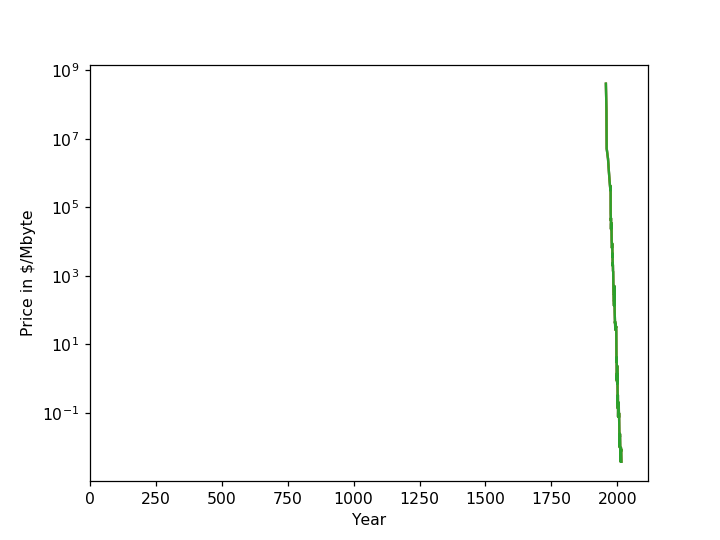

In [55]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

最初の分岐に用いた特徴量「worst radius」が群を抜いて重要な特徴量とわかる

ただし、「worst radius」の値が大きいと良性になるのか悪性になるのかを教えてくれるわけではない。

実際、次の例で示すように、特徴量とクラスの関係はそれほど単純ではない

In [56]:
# tree = mglearn.plots.plot_tree_not_monotone()
# display(tree)

# graphvizがないので省略。。

In [57]:
import os

In [58]:
ram_prices = pd.read_csv(os.path.join("data", "ram_price.csv"))

In [61]:
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

# グラフが出ない、だと。。？

Text(35.6865,0.5,'Price in $/Mbyte')